In [ ]:
import pandas as pd
import numpy as np
import json
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/<base_path>/Results"

In [ ]:
with open(f"{path}/act_CNN_LSTM_AM.json", 'r') as file:
    # Load JSON data from the file
    act = json.load(file)

with open(f"{path}/pred_CNN_LSTM_AM.json", 'r') as file:
    # Load JSON data from the file
    pred = json.load(file)

In [ ]:
companies = pd.read_csv(r"/content/drive/MyDrive/<base_path>/Dataset/nasdaq_screener.csv")
companies = companies [['Symbol','Sector']]
result=companies['Symbol'].isin(list(act.keys()))
companies = companies[result]
companies = companies.reset_index(drop=True,inplace=False)
grouped=companies.groupby('Sector')

RMSE Calculations for Sector

In [ ]:
rmse_over_sector = {}
for symbol,group in grouped:
  print(symbol)
  avg_mse=0
  for value in group['Symbol']:
    tmp_act=act[value]
    tmp_pred=pred[value]
    avg_mse+=np.sqrt(mean_squared_error(tmp_act,tmp_pred))
  print("Average RMSE", avg_mse/len(group))
  rmse_over_sector[symbol]=avg_mse/len(group)

MSE Calculcations for Sector

In [ ]:
avg_price_of_stocks_in_sector={}
print("Average Price of Stocks Present in Each Sector")
for symbol,group in grouped:
  print(symbol)
  avg_stock_price=0
  for value in group['Symbol']:
    avg_stock_price+=sum(act[value])/len(act[value])
  print("Average Stock Price in Sector:", (avg_stock_price/len(group)))
  avg_price_of_stocks_in_sector[symbol]=(avg_stock_price/len(group))

MAPE Calculation for Sector

In [ ]:
ind_company_mape={}
mape_sector={}
print("Average MAPE per Sector")
for symbol,group in grouped:
  print(symbol)
  avg_mape=0
  tmp_act=[]
  tmp_pred=[]
  for value in group['Symbol']:
    ind_company_mape[value]=mean_absolute_percentage_error(act[value],pred[value])
    tmp_act+=act[value]
    tmp_pred+=pred[value]
    avg_mape+=mean_absolute_percentage_error(tmp_act,tmp_pred)
  print("Average MAPE:", (avg_mape/len(group))*100)
  mape_sector[symbol]=100*avg_mape/len(group)

RMSE Plots

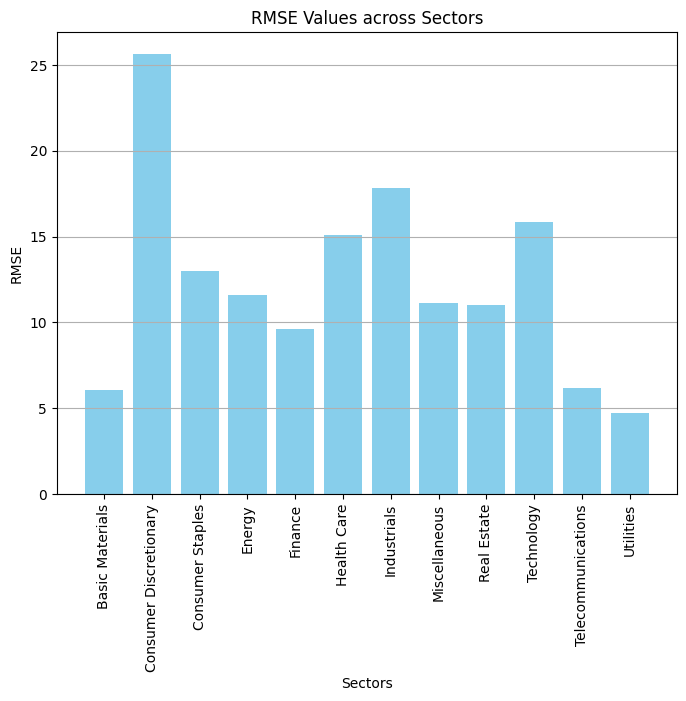

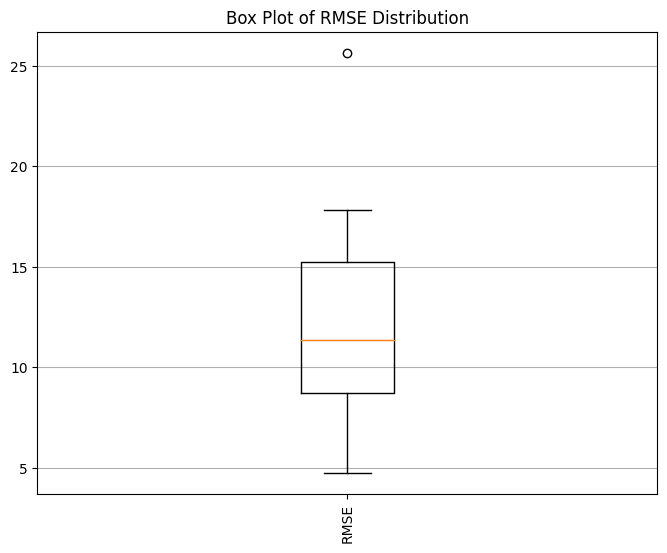

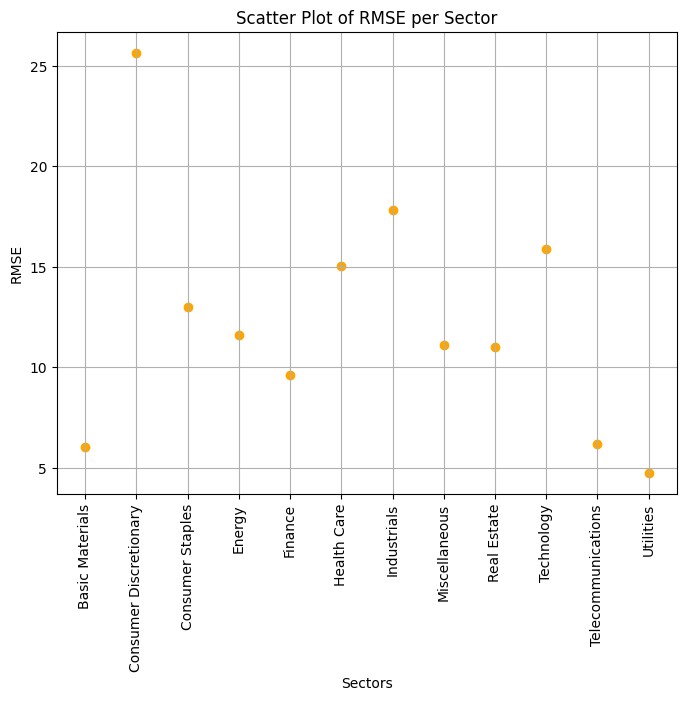

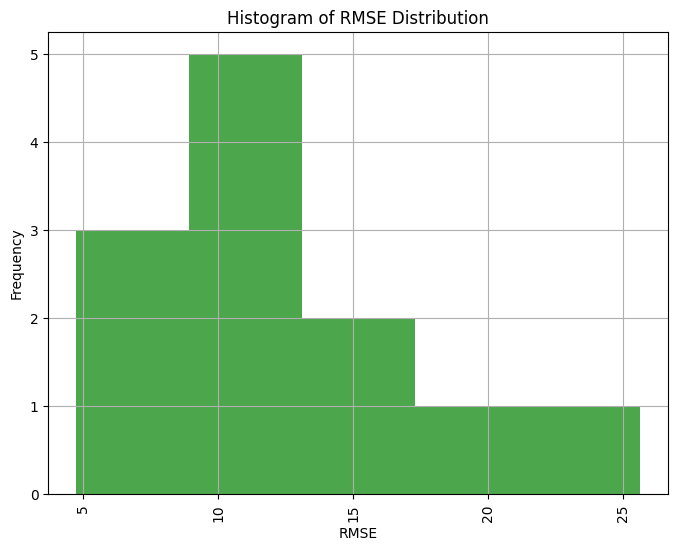

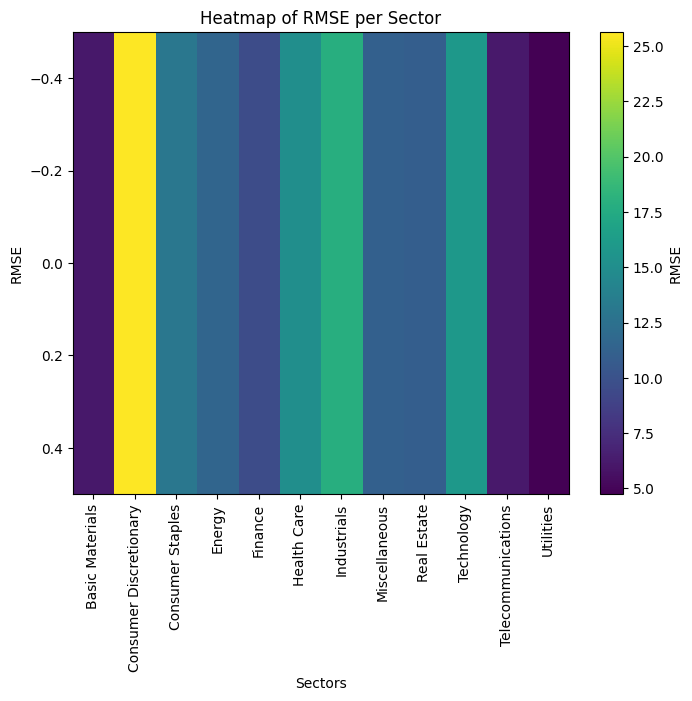

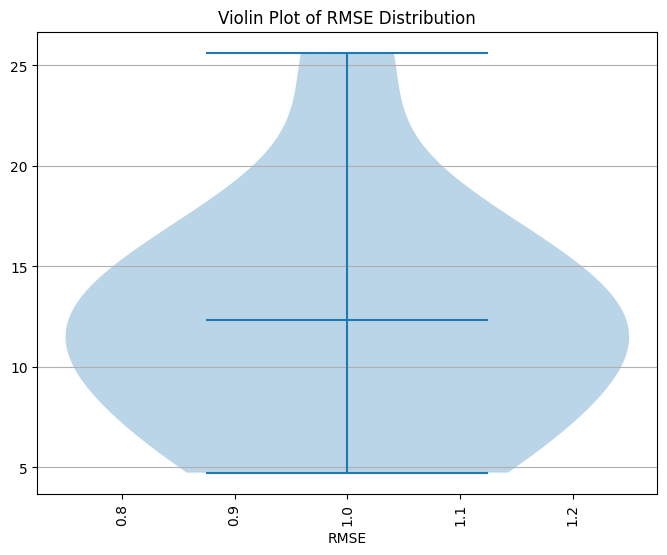

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)

# Bar plot for RMSE values across sectors
plt.figure(figsize=(8, 6))
sectors = list(rmse_over_sector.keys())
rmse_values = list(rmse_over_sector.values())
plt.bar(sectors, rmse_values, color='skyblue')
plt.xlabel('Sectors')
plt.ylabel('RMSE')
plt.title('RMSE Values across Sectors')
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.savefig(f'{path}/Bar_chart_CNN_LSTM_AM.png')
plt.show()

# Box plot for RMSE distribution
plt.figure(figsize=(8, 6))
plt.boxplot(rmse_values, labels=['RMSE'])
plt.title('Box Plot of RMSE Distribution')
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show()

# Scatter plot for single RMSE value per sector
plt.figure(figsize=(8, 6))
plt.scatter(range(len(sectors)), rmse_values, color='orange')
plt.xticks(range(len(sectors)), sectors)
plt.xlabel('Sectors')
plt.xticks(rotation=90)
plt.ylabel('RMSE')
plt.title('Scatter Plot of RMSE per Sector')
plt.grid(True)
plt.show()

# Histogram for RMSE distribution
plt.figure(figsize=(8, 6))
plt.hist(rmse_values, bins=5, color='green', alpha=0.7)
plt.xlabel('RMSE')
plt.ylabel('Frequency')
plt.title('Histogram of RMSE Distribution')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Heatmap for single RMSE value per sector
plt.figure(figsize=(8, 6))
hm_data = np.array([rmse_values])
plt.imshow(hm_data, cmap='viridis', aspect='auto')
plt.colorbar(label='RMSE')
plt.xticks(np.arange(len(sectors)), sectors)
plt.xlabel('Sectors')
plt.ylabel('RMSE')
plt.title('Heatmap of RMSE per Sector')
plt.xticks(rotation=90)
plt.show()

# Violin plot for RMSE distribution
plt.figure(figsize=(8, 6))
plt.violinplot(rmse_values, showmeans=True)
plt.xlabel('RMSE')
plt.title('Violin Plot of RMSE Distribution')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.savefig(f'{path}/Violin_chart_CNN_LSTM_AM.png')
plt.show()

MAPE Plots

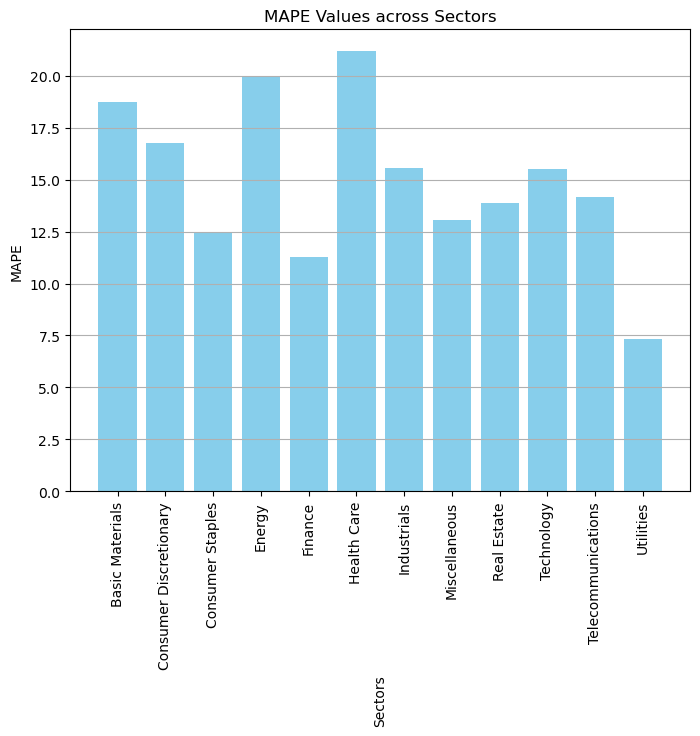

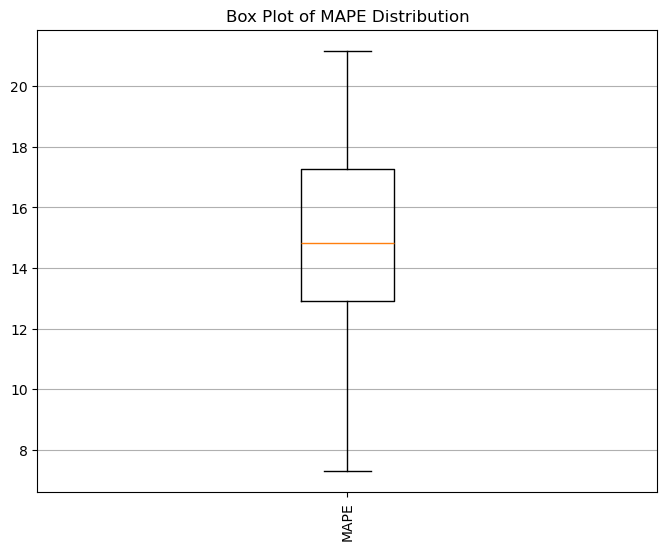

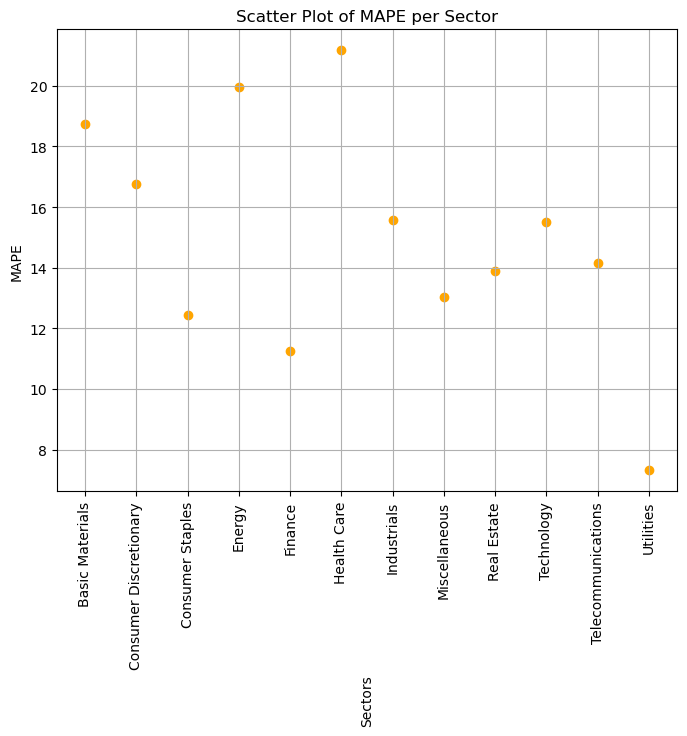

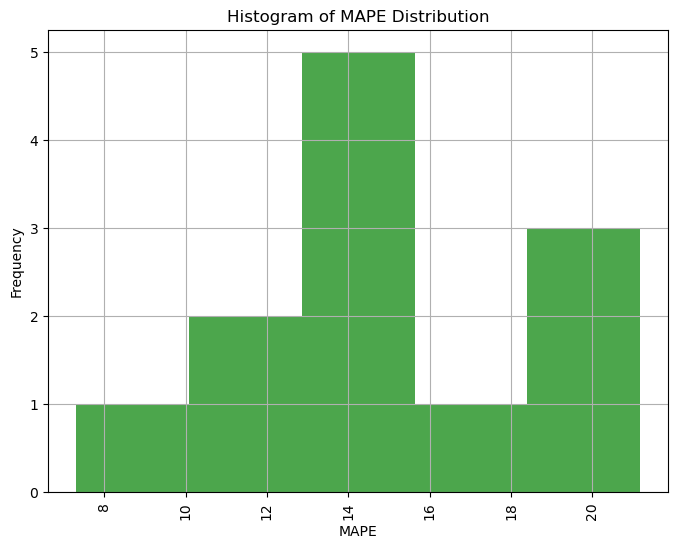

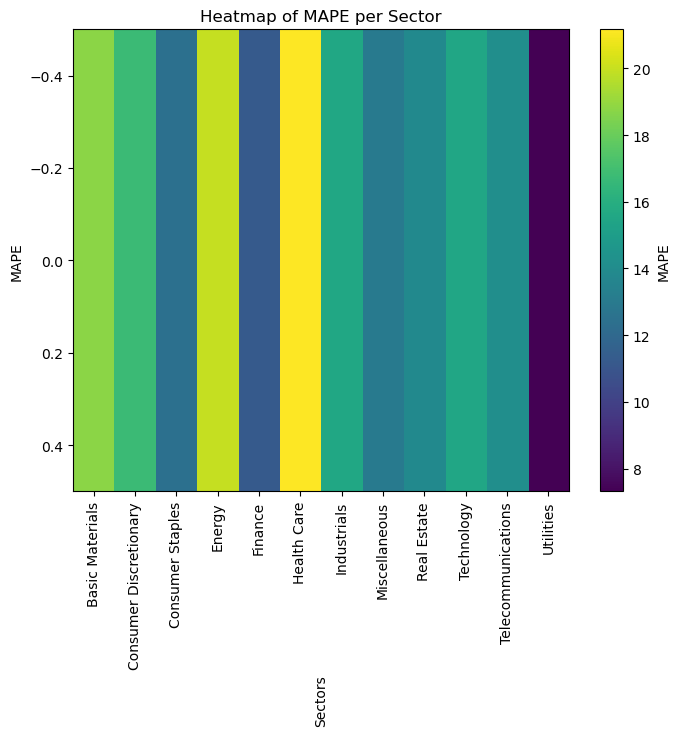

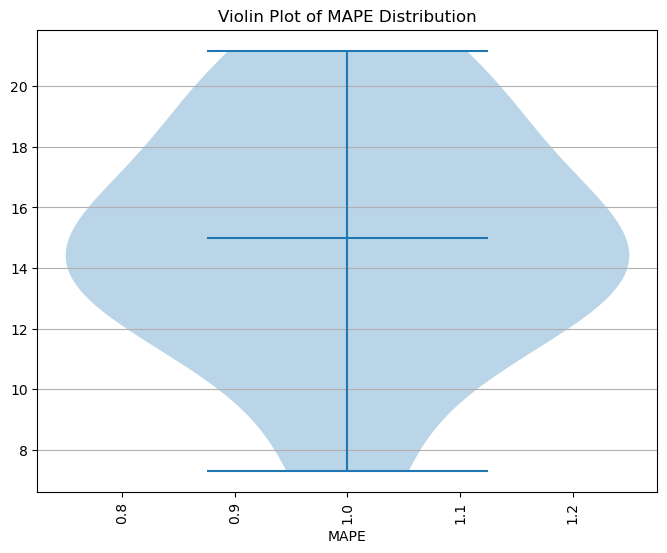

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)

# Bar plot for MAPE values across sectors
plt.figure(figsize=(8, 6))
sectors = list(mape_sector.keys())
mape_values = list(mape_sector.values())
plt.bar(sectors, mape_values, color='skyblue')
plt.xlabel('Sectors', rotation=90)  # Rotate x-axis tick labels by 90 degrees
plt.ylabel('MAPE')
plt.title('MAPE Values across Sectors')
plt.xticks(rotation=90)  # Rotate y-axis tick labels by 90 degrees
plt.grid(axis='y')
plt.show()

# Box plot for MAPE distribution
plt.figure(figsize=(8, 6))
plt.boxplot(mape_values, labels=['MAPE'])
plt.title('Box Plot of MAPE Distribution')
plt.xticks(rotation=90)  # Rotate x-axis tick labels by 90 degrees
plt.grid(axis='y')
plt.show()

# Scatter plot for single MAPE value per sector
plt.figure(figsize=(8, 6))
plt.scatter(range(len(sectors)), mape_values, color='orange')
plt.xticks(range(len(sectors)), sectors, rotation=90)  # Rotate x-axis tick labels by 90 degrees
plt.xlabel('Sectors', rotation=90)  # Rotate x-axis label by 90 degrees
plt.ylabel('MAPE')
plt.title('Scatter Plot of MAPE per Sector')
plt.grid(True)
plt.show()

# Histogram for MAPE distribution
plt.figure(figsize=(8, 6))
plt.hist(mape_values, bins=5, color='green', alpha=0.7)
plt.xlabel('MAPE')
plt.ylabel('Frequency')
plt.title('Histogram of MAPE Distribution')
plt.xticks(rotation=90)  # Rotate x-axis tick labels by 90 degrees
plt.grid(True)
plt.show()

# Heatmap for single MAPE value per sector
plt.figure(figsize=(8, 6))
hm_data = np.array([mape_values])
plt.imshow(hm_data, cmap='viridis', aspect='auto')
plt.colorbar(label='MAPE')
plt.xticks(np.arange(len(sectors)), sectors, rotation=90)  # Rotate x-axis tick labels by 90 degrees
plt.xlabel('Sectors', rotation=90)  # Rotate x-axis label by 90 degrees
plt.ylabel('MAPE')
plt.title('Heatmap of MAPE per Sector')
plt.show()

# Violin plot for MAPE distribution
plt.figure(figsize=(8, 6))
plt.violinplot(mape_values, showmeans=True)
plt.xlabel('MAPE')
plt.title('Violin Plot of MAPE Distribution')
plt.xticks(rotation=90)  # Rotate x-axis tick labels by 90 degrees
plt.grid(axis='y')
plt.show()


In [ ]:
rmse_over_sector = {}
mape_over_sector = {}
avg_stock_price_over_sector = {}

print("Average Metrics per Sector")
for symbol, group in grouped:
    print(symbol)
    avg_mse = 0
    avg_mape = 0
    avg_stock_price = 0

    # Calculate RMSE and MAPE
    for value in group['Symbol']:
        tmp_act = act[value]
        tmp_pred = pred[value]
        avg_mse += np.sqrt(mean_squared_error(tmp_act, tmp_pred))
        avg_mape += mean_absolute_percentage_error(tmp_act, tmp_pred)

    # Calculate average stock price
    avg_stock_price = sum(act[value])/len(act[value])

    # Calculate averages
    avg_rmse = avg_mse / len(group)
    avg_mape = (avg_mape / len(group)) * 100

    print("Average RMSE:", avg_rmse)
    print("Average MAPE:", avg_mape)
    print("Average Stock Price in Sector:", avg_stock_price)

    rmse_over_sector[symbol] = avg_rmse
    mape_over_sector[symbol] = avg_mape
    avg_stock_price_over_sector[symbol] = avg_stock_price

# Convert to DataFrame
df_metrics = pd.DataFrame({
    'Sector': list(rmse_over_sector.keys()),
    'Average RMSE': list(rmse_over_sector.values()),
    'Average MAPE': list(mape_over_sector.values()),
    'Average Stock Price': list(avg_stock_price_over_sector.values())
})

In [ ]:
table = df_metrics.to_latex(index=False)

# Plotting parameters
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')  # Turn off axis
ax.table(cellText=df_metrics.values, colLabels=df_metrics.columns, loc='center')
plt.savefig(f'{path}/table_MLP.png')

In [ ]:
with open(rf"{path}/pct_CNN_LSTM_AM.json", 'r') as f1:
    data1 = json.load(f1)

min_key = min(data1, key=data1.get)
min_value = data1[min_key]

print("Minimum value:", min_value)
print("Corresponding key:", min_key)

Minimum value: 0.014125959078519828
Corresponding key: ODC


In [ ]:
companies = pd.read_csv(r"/content/drive/MyDrive/<base_path>/Dataset/main.csv")

In [ ]:
min_company_info = companies[companies['Symbol'] == min_key]

In [ ]:
with open(rf"{path}/act_CNN_LSTM_AM.json", 'r') as f1:
    data1 = json.load(f1)

# Load the second JSON file
with open(rf"{path}/pred_CNN_LSTM_AM.json", 'r') as f2:
    data2 = json.load(f2)

print("data1", data1)
print("data2", data2)

data1 {'A': [100.41468713992879, 117.2911476370729, 126.4112696096231, 141.99396670346616, 163.31796719486914, 152.25225652520297], 'AAON': [42.22349201180609, 48.984945982457184, 44.128783025623676, 43.39227503975262, 49.95301631766108, 40.947830744160996], 'AAP': [154.1833328860409, 167.56209617691266, 195.81206366627185, 208.36460409814157, 228.23206590328712, 220.2041279644661], 'AAPL': [109.00908684161585, 120.08428605692627, 128.42790275751906, 129.3338094559238, 147.31380869257697, 157.7269834588252], 'AB': [31.57777790132279, 37.46758060450906, 43.46476189409263, 49.28015843545591, 52.33999955146687, 46.53809519306474], 'ABCB': [32.283333266229256, 47.365806530156654, 53.74920671038722, 48.62968264892348, 51.72047653627108, 49.273016022520714], 'ABEV': [2.691428587632916, 2.827580648033269, 3.242857134493449, 3.172063500960614, 2.8663492161170336, 2.793650801250344], 'ABG': [123.63492097433974, 168.20983769115992, 192.71873265313815, 188.33238318070875, 184.2668260888369, 174.9

In [ ]:
min_act = data1[min_key]
min_pred = data2[min_key]

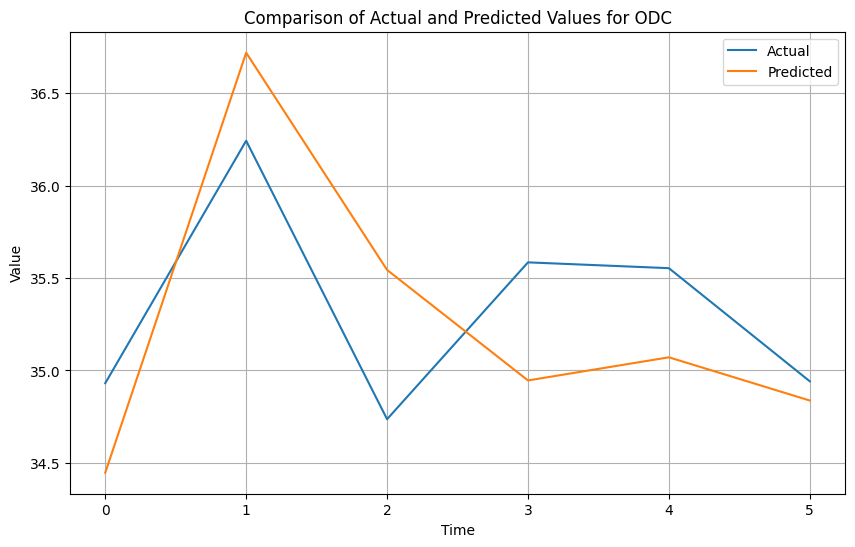

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(min_act, label='Actual')
plt.plot(min_pred, label='Predicted')
plt.title('Comparison of Actual and Predicted Values for ' + min_key)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
min_company_info = companies[companies['Symbol'] == min_key].iloc[:80]
min_company_info1 = companies[companies['Symbol'] == min_key].iloc[:80]

min_company_info = min_company_info[40:80]
min_company_info1 = min_company_info1[40:80]
print("Information for the company with symbol:", min_key)
print(min_company_info)

Information for the company with symbol: ODC
       Symbol period_end_date   revenue  pretax_income  income_tax  \
122778    ODC         2011-10  59582000        1473000     -398000   
122779    ODC         2012-01  60203000        4279000    -1040000   
122780    ODC         2012-04  59780000        2634000     -742000   
122781    ODC         2012-07  61116000         -25000      -83000   
122782    ODC         2012-10  61417000        6057000    -1605000   
122783    ODC         2013-01  61122000        3031000     -885000   
122784    ODC         2013-04  64152000        4441000    -1190000   
122785    ODC         2013-07  63892000        3970000      767000   
122786    ODC         2013-10  63546000        3893000    -1006000   
122787    ODC         2014-01  69305000        5530000    -1249000   
122788    ODC         2014-04  67417000         863000     -141000   
122789    ODC         2014-07  66045000        1051000     -585000   
122790    ODC         2014-10  66044000      

In [ ]:
Average_Stock_Value_After_Result  = min_company_info.iloc[:, -1]

print(Average_Stock_Value_After_Result)

122778    20.197869
122779    20.868889
122780    20.583809
122781    22.877778
122782    25.016557
122783    27.058730
122784    28.104286
122785    32.728281
122786    37.055902
122787    33.829682
122788    30.909048
122789    28.664531
122790    29.999016
122791    31.996032
122792    30.156032
122793    25.042813
122794    33.866885
122795    35.115238
122796    34.229206
122797    36.371406
122798    37.191311
122799    36.438572
122800    39.527302
122801    42.772500
122802    42.609016
122803    38.545873
122804    41.576825
122805    37.840938
122806    28.632333
122807    30.151270
122808    31.853333
122809    32.634531
122810    36.214918
122811    33.570635
122812    34.931270
122813    36.243125
122814    34.736393
122815    35.585079
122816    35.553651
122817    34.941406
Name: Average_Stock_Value_After_Result, dtype: float64


In [ ]:
min_pred_length = len(min_pred)

# Get the last column of min_company_info
last_column = min_company_info.iloc[:, -1]

# Replace the last min_pred_length elements of the last column with values from min_pred
last_column.iloc[-min_pred_length:] = min_pred[:min_pred_length]

# Update the last column in min_company_info
min_company_info.iloc[:, -1] = last_column

print(min_company_info)

       Symbol period_end_date   revenue  pretax_income  income_tax  \
122778    ODC         2011-10  59582000        1473000     -398000   
122779    ODC         2012-01  60203000        4279000    -1040000   
122780    ODC         2012-04  59780000        2634000     -742000   
122781    ODC         2012-07  61116000         -25000      -83000   
122782    ODC         2012-10  61417000        6057000    -1605000   
122783    ODC         2013-01  61122000        3031000     -885000   
122784    ODC         2013-04  64152000        4441000    -1190000   
122785    ODC         2013-07  63892000        3970000      767000   
122786    ODC         2013-10  63546000        3893000    -1006000   
122787    ODC         2014-01  69305000        5530000    -1249000   
122788    ODC         2014-04  67417000         863000     -141000   
122789    ODC         2014-07  66045000        1051000     -585000   
122790    ODC         2014-10  66044000        2865000     -745000   
122791    ODC       

<ipython-input-60-3497b562f9de>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_column.iloc[-min_pred_length:] = min_pred[:min_pred_length]


In [ ]:
min_pred

[34.446865163688145,
 36.71937669886017,
 35.544140413556114,
 34.946157294427465,
 35.07131359883408,
 34.837523638372964]

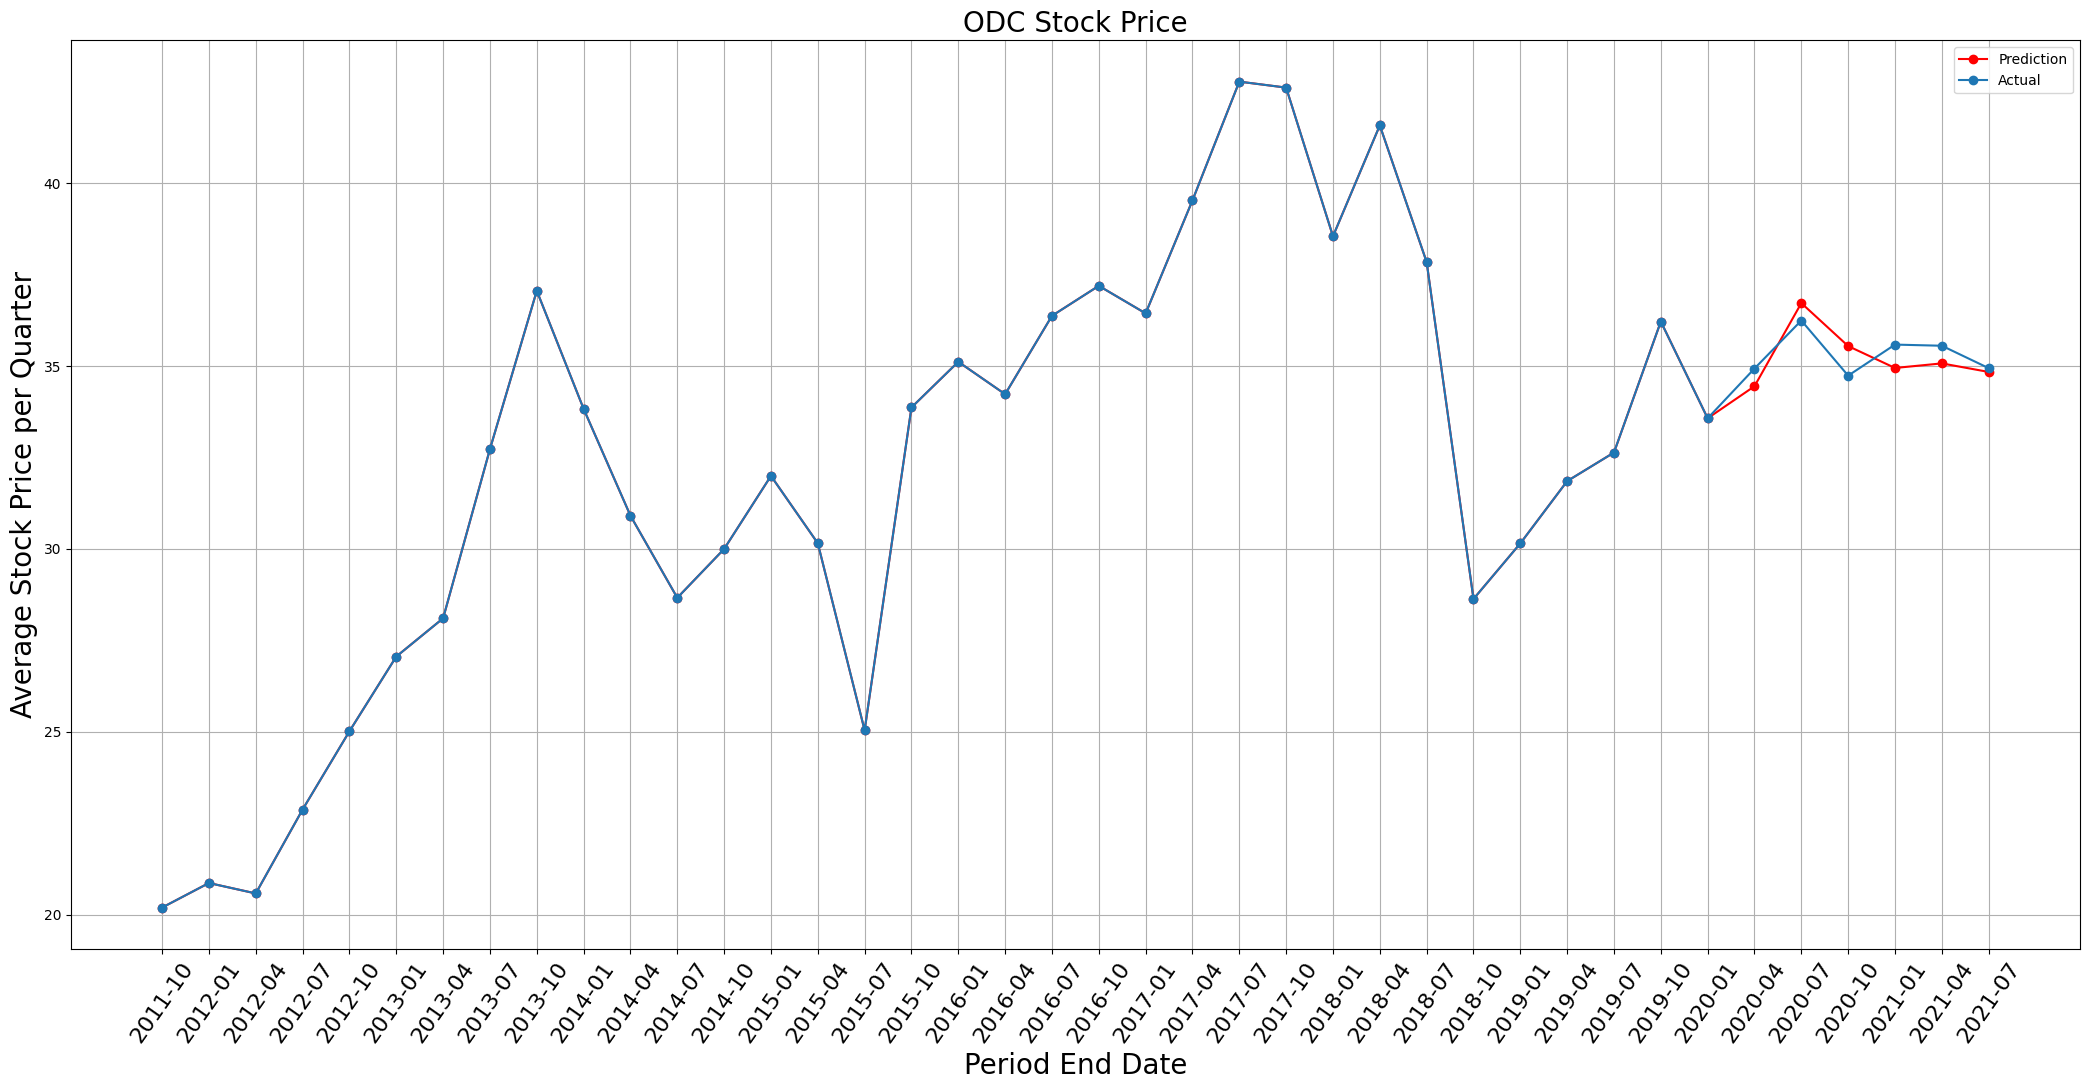

In [ ]:
plt.figure(figsize=(21, 11))
plt.plot(min_company_info["period_end_date"], min_company_info.iloc[:, -1], label="Prediction", color="red", marker='o')
plt.plot(min_company_info1["period_end_date"], min_company_info1.iloc[:, -1], label="Actual", marker='o')
plt.xlabel("Period End Date", fontsize=20)
plt.ylabel("Average Stock Price per Quarter", fontsize=20)
plt.title("ODC Stock Price", fontsize=20)
plt.legend()
plt.grid(True)
plt.xticks(rotation=55, fontsize=16)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()